Below we have selected all the packages we will need for this assignment.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as mtick
import os

Here, I am setting the variables to equal what was specified in our assignment

In [31]:
current_rate = 0.05  # Current Interest Rate of 5%
mean_rate = 0  # Mean Rate
standard_deviation_cd = 0.00625  # Standard Deviation
total_days = 90  # total # of days in our analysis
total_simulation = 10  # Number of simulations we will run

Now, I'm beginning to strucuture an object for our x axis, representing each day over 90 days

In [32]:
total_days_90 = np.arange(1, total_days)

Here i'm making a blank object representing 90 0-values that will be used some for later code

In [33]:
rate_simulation = np.zeros((total_simulation, total_days))

Here i'm adding a for loop that does the following, 
for wach simulation
1) we generate numbers in a normal distribution such that our mean is our mean rate, our standard deviation is what we specified initially, and we do so 90 times, one for each day
2)  We start determing our rate lane which takes our initial rate of 5%, and multiplies it by the exponent of sums of all those rates previously generated for each day
3) Lastly, we attribute each 90 day simulation to one of our 10 lines

In [34]:
for i in range(total_simulation):
    daily_variability = np.random.normal(mean_rate, standard_deviation_cd, total_days)
    rate_line = current_rate * np.exp(np.cumsum(daily_variability))
    rate_simulation[i] = rate_line

Now I'm defining what today is and the x axis for the next 90 days

In [35]:
today = dt.date.today()
dates_on_xaxis = [today + dt.timedelta(days=i) for i in range(total_days)]

Lastly, here's the code to plot everything generated above into a matplotlib chart

In [36]:
def plot_interest_rate_variability(dates_on_xaxis, rate_simulation, total_simulation):
    # Specify the save directory
    save_dir = r"C:\Users\chris\Downloads\IDS789\Interest_Rate_Simulation"

    plt.figure(figsize=(15, 9))

    # Plot each simulation
    for i in range(total_simulation):
        plt.plot(dates_on_xaxis, rate_simulation[i], label=f"Simulation {i + 1}")

    # Set labels and title
    plt.xlabel("Dates in the next 3 months")
    plt.ylabel("Interest Rate (%)")
    plt.title("CD Interest Rate Variability - 90 Days")

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    # Format y-axis as percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Add legend
    plt.legend(title="Simulation Paths", loc="best")

    # Adjust layout
    plt.tight_layout()

    # Ensure the directory exists, and save the plot
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save the plot to the specified directory
    plot_path = os.path.join(save_dir, "cd_interest_rate_variability.png")
    plt.savefig(plot_path)

    # Show the plot (optional)
    plt.show()

    print(f"Plot saved to: {plot_path}")


# Example usage
# plot_interest_rate_variability(dates_on_xaxis, rate_simulation, total_simulation, 'your/save/directory')

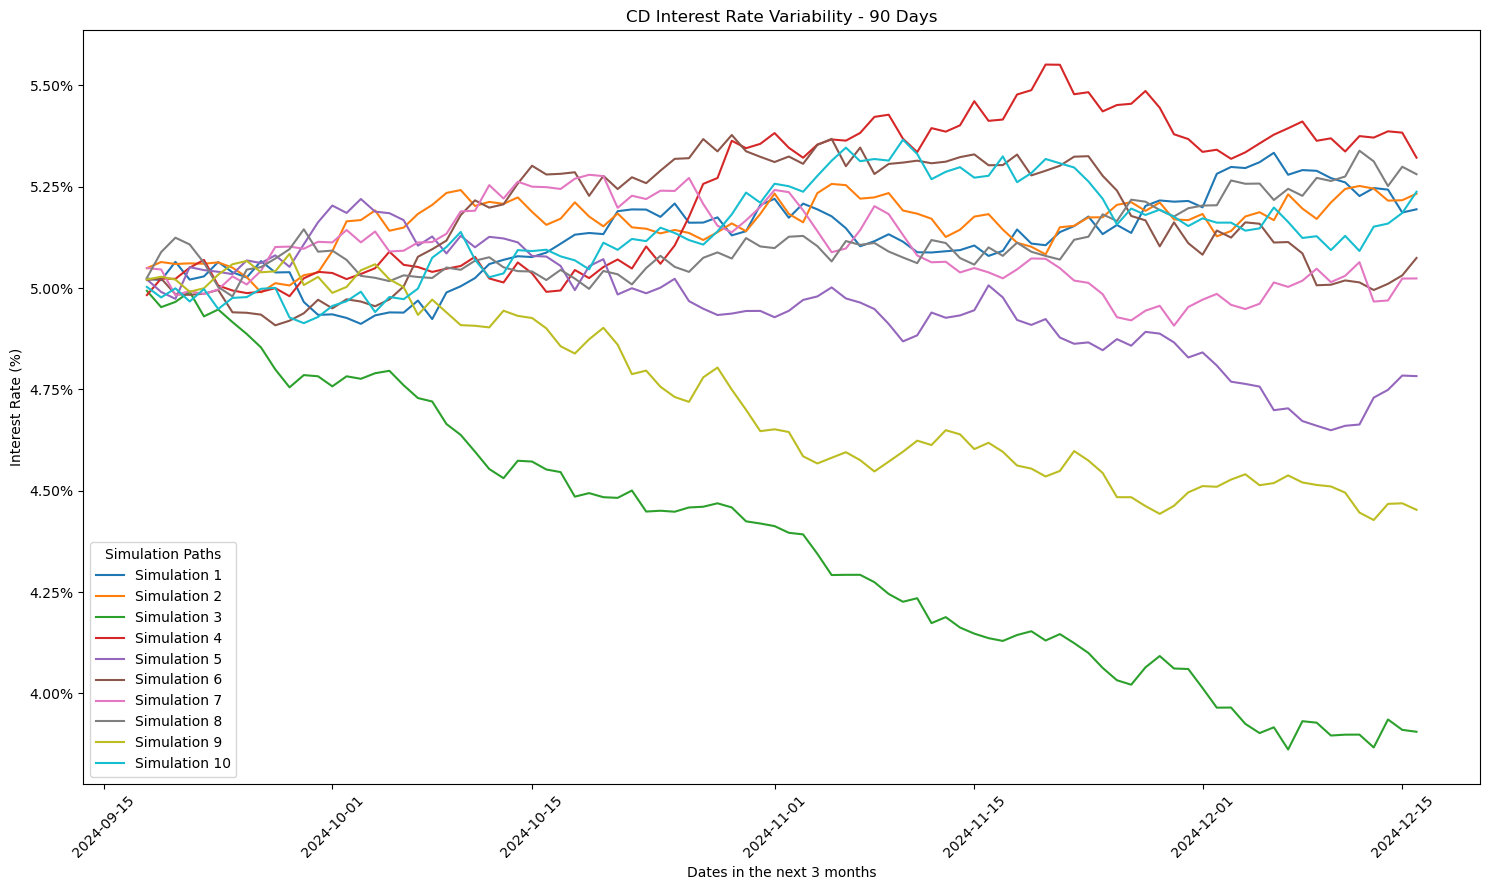

Plot saved to: C:\Users\chris\Downloads\IDS789\Interest_Rate_Simulation\cd_interest_rate_variability.png


In [37]:
plot_interest_rate_variability(dates_on_xaxis, rate_simulation, total_simulation)